In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import zscore

In [305]:
df = pd.read_csv("diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [311]:
colunas_sem_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df = df[(df[colunas_sem_zero] != 0).all(axis=1)]

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

for coluna in colunas_sem_zero:
    df = remove_outliers_iqr(df, coluna)

print(df.head())

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
14            5      166             72             19      175  25.8   
16            0      118             84             47      230  45.8   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
14                     0.587   51        1  
16                     0.551   31        1  


In [313]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   356.000000  356.000000     356.000000     356.000000  356.000000   
mean      3.303371  119.752809      70.426966      28.502809  132.789326   
std       3.213193   29.191174      11.289170      10.121654   73.159467   
min       0.000000   56.000000      38.000000       7.000000   15.000000   
25%       1.000000   98.750000      62.000000      20.000000   75.000000   
50%       2.000000  117.000000      70.000000      29.000000  120.000000   
75%       5.000000  138.000000      78.000000      36.000000  176.500000   
max      17.000000  198.000000     102.000000      52.000000  342.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  356.000000                356.000000  356.000000  356.000000  
mean    32.448876                  0.512278   30.651685    0.306180  
std      6.306837                  0.313725   10.003494    0.461554  
min     18.200000                  

In [315]:
cols_with_zero = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols_with_zero:
    print(f'{col}: {df[col].value_counts().get(0, 0)} valores zero')

Pregnancies: 49 valores zero
Glucose: 0 valores zero
BloodPressure: 0 valores zero
SkinThickness: 0 valores zero
Insulin: 0 valores zero
BMI: 0 valores zero
DiabetesPedigreeFunction: 0 valores zero
Age: 0 valores zero


In [149]:
'''z_scores = zscore(df.select_dtypes(include='number'))

outliers_z = (abs(z_scores) > 3)

print("Outliers Z-score:")
print(pd.DataFrame(outliers_z, columns=df.select_dtypes(include='number').columns).sum())

Outliers Z-score:
Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                4
Insulin                     20
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


In [317]:
def detectar_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].shape[0]
    return outliers

outliers_iqr = detectar_outliers_iqr(df)
print("Outliers IQR:")
print(pd.Series(outliers_iqr))

Outliers IQR:
Pregnancies                 11
Glucose                      1
BloodPressure                0
SkinThickness                0
Insulin                      3
BMI                          0
DiabetesPedigreeFunction    10
Age                         11
Outcome                      0
dtype: int64


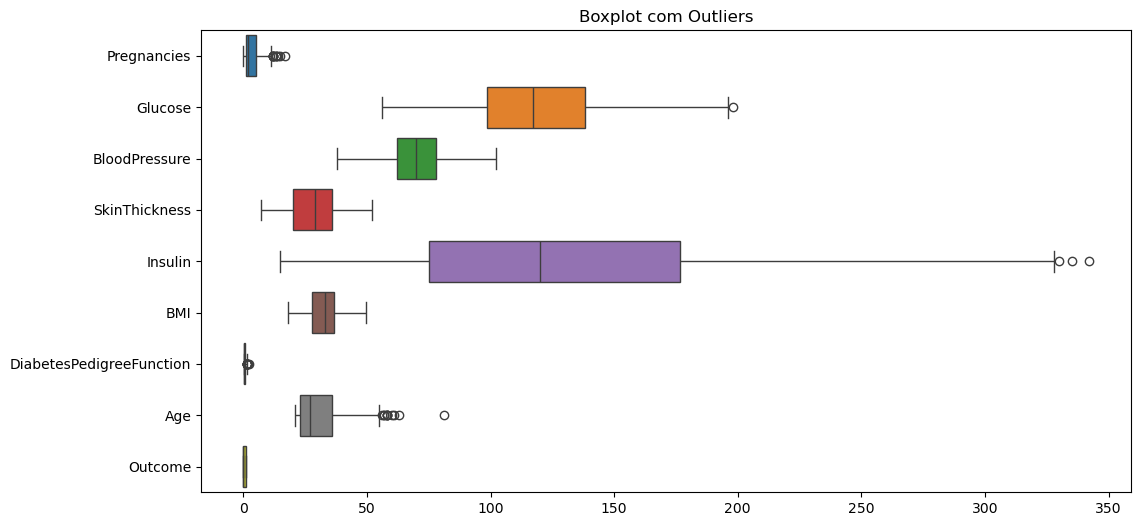

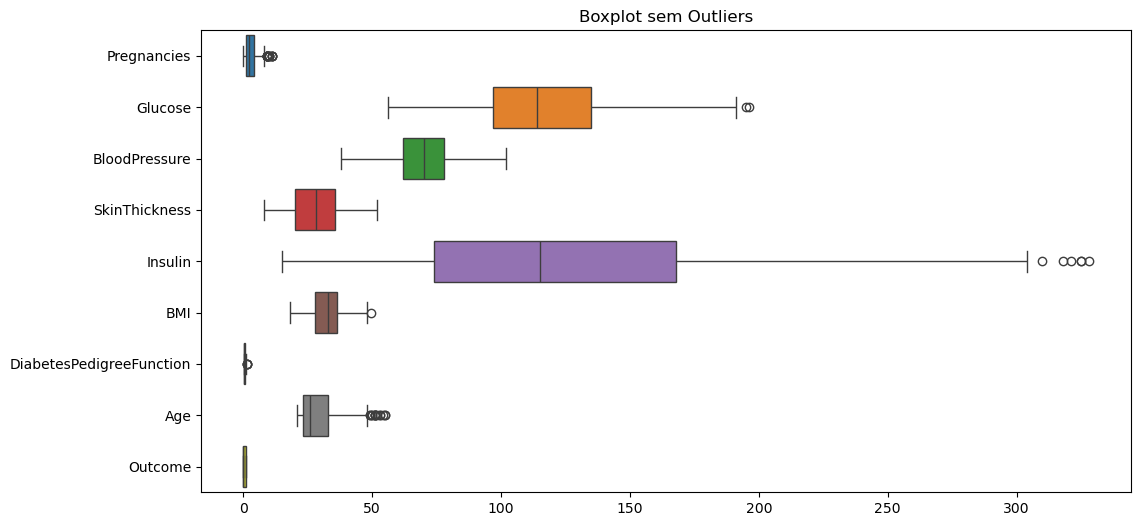

In [319]:
def detectar_outliers_iqr(df):
    outlier_indices = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < limite_inferior) | (df[col] > limite_superior)
        outlier_indices[col] = df[outlier_mask].index.tolist()
    return outlier_indices

outliers_por_coluna = detectar_outliers_iqr(df)

todos_outliers = set()
for indices in outliers_por_coluna.values():
    todos_outliers.update(indices)

df_sem_outliers = df.drop(index=todos_outliers).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot com Outliers")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sem_outliers, orient='h')
plt.title("Boxplot sem Outliers")
plt.show()

In [367]:
'''correlation_matrix = df.corr()
target_column = 'Outcome'
cor_target = correlation_matrix[target_column].drop(target_column)

print("Correlação de cada variável:".format(target_column))
for feature, corr in cor_target.sort_values(ascending=False).items():
    print(f"{feature}: {corr:.2f}")

print("Quanto mais próximo de 1, maior a correlação")

Correlação de cada variável:
Glucose: 0.51
Age: 0.34
Insulin: 0.33
Pregnancies: 0.28
BMI: 0.26
DiabetesPedigreeFunction: 0.23
SkinThickness: 0.23
BloodPressure: 0.21
Quanto mais próximo de 1, maior a correlação


In [369]:
correlacoes = df.corr(method='pearson')

print(correlacoes['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.509917
Age                         0.343463
Insulin                     0.331598
Pregnancies                 0.275282
BMI                         0.262702
DiabetesPedigreeFunction    0.234351
SkinThickness               0.232261
BloodPressure               0.207304
Name: Outcome, dtype: float64


In [359]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

y_prev = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_prev)
report = classification_report(y_test, y_prev)

print(accuracy)
print(report)
print(confusion_matrix(y_test, y_pred))

0.7777777777777778
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        50
           1       0.61      0.77      0.68        22

    accuracy                           0.78        72
   macro avg       0.75      0.78      0.75        72
weighted avg       0.80      0.78      0.78        72

[[44  6]
 [10 12]]
